# Autoregressive Integrated Moving Average Model

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

A popular and widely used statistical method for time series forecasting is the ARIMA model.

#### AR: Autoregression 
A model that uses the dependent relationship between an observation and some number of lagged observations.

#### I: Integrated
The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

#### MA: Moving Average
A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

#### Shampoo Sales Dataset
This dataset describes the monthly number of sales of shampoo over a 3 year period.

The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright, and Hyndman (1998).

Learn more about the dataset and download it from here.

Download the dataset and place it in your current working directory with the filename “shampoo-sales.csv“.

Below is an example of loading the Shampoo Sales dataset with Pandas with a custom function to parse the date-time field. The dataset is baselined in an arbitrary year, in this case 1900.

Month
2019-01-01    266.0
2019-02-01    145.9
2019-03-01    183.1
2019-04-01    119.3
2019-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


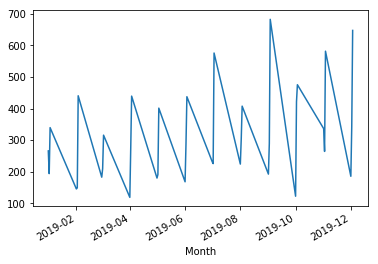

In [43]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
series = read_csv('C:\\Users\\Sreekanth\\Documents\\New Batch\\Assignments\\Assignment_32\\shampoo-sales.csv',
                header=0, parse_dates=[0], index_col=0, squeeze=True)

print(series.head())
series.plot()
pyplot.show()

We can see that the Shampoo Sales dataset has a clear trend. This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.
Let’s also take a quick look at an autocorrelation plot of the time series. This is also built-in to Pandas. The example below plots the autocorrelation for a large number of lags in the time series.

C:\Users\Sreekanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


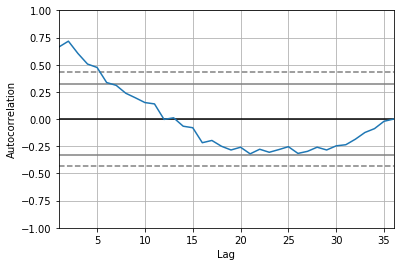

In [45]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

### ARIMA with Python
The statsmodels library provides the capability to fit an ARIMA model.

An ARIMA model can be created using the statsmodels library as follows:

Define the model by calling ARIMA() and passing in the p, d, and q parameters.
The model is prepared on the training data by calling the fit() function.
Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.
Let’s start off with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

C:\Users\Sreekanth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\signal\signaltools.p

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sat, 23 Feb 2019   AIC                            406.340
Time:                                                 17:25:26   BIC                            417.227
Sample:                                                      1   HQIC                           410.098
                                                                                                       
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

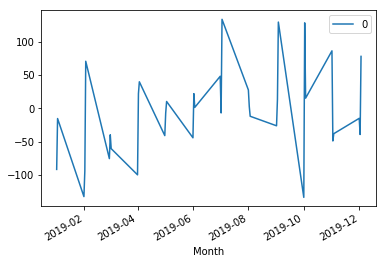

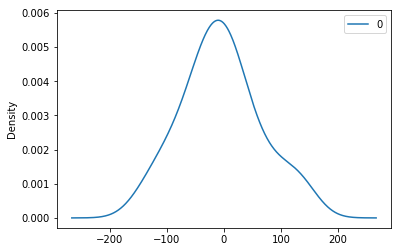

                0
count   35.000000
mean    -5.495254
std     68.132879
min   -133.296630
25%    -42.477923
50%     -7.186696
75%     24.748294
max    133.237951


In [50]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = DataFrame(model_fit.resid)

residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

print(residuals.describe())

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

#### Rolling Forecast ARIMA Model

The ARIMA model can be used to forecast future time steps.

We can use the predict() function on the ARIMA Results object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

If we used 100 observations in the training dataset to fit the model, then the index of the next time step for making a prediction would be specified to the prediction function as start=101, end=101. This would return an array with one element containing the prediction.

We also would prefer the forecasted values to be in the original scale, in case we performed any differencing (d>0 when configuring the model). This can be specified by setting the typ argument to the value ‘levels’: typ=’levels’.

Alternately, we can avoid all of these specifications by using the forecast() function, which performs a one-step forecast using the model.

We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.

We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration.

Putting this all together, below is an example of a rolling forecast with the ARIMA model in Python.

C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interprete

predicted=349.117623, expected=342.300000
predicted=306.512928, expected=339.700000
predicted=387.376405, expected=440.400000
predicted=348.154206, expected=315.900000
predicted=386.308782, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379487, expected=437.400000
predicted=394.737317, expected=575.500000
predicted=434.915513, expected=407.600000
predicted=507.923355, expected=682.000000
predicted=435.482830, expected=475.300000
predicted=652.743749, expected=581.300000
predicted=546.343527, expected=646.900000
Test MSE: 6958.326


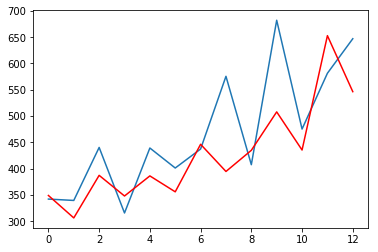

In [52]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

This is a process that uses time series analysis and diagnostics to discover good parameters for the ARIMA model.

In summary, the steps of this process are as follows:

Model Identification. Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.

Parameter Estimation. Use a fitting procedure to find the coefficients of the regression model.

Model Checking. Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.

The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).